In [1]:
# import MLP.MLP_module as mlp
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# GW_data = pd.read_csv('data_for_MLP/training/_O4_MLP_data_HLV_1000000_det_H1_L1_V1_run_O4_approx_IMRPhenomXPHM_batch_1.csv')
# GW_data.loc[:, 'geocent_time'] = GW_data['geocent_time'] % 86164.1

# # Split the DataFrame into input features (X) and target values (y)
# X = GW_data[[ 'luminosity_distance', 'mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'ra', 'dec', 'theta_jn', 'phi_jl', 'phi_12','psi','geocent_time']].values
# y = GW_data[['snr_H1', 'snr_L1', 'snr_V1']].values


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and set device for the model
# model = mlp.MLP(input_size=14, hidden_layers=[128]*4, output_size=3 )
# model.set_device(device = 'cuda:0')
# # Train the model with training and validation data
# model.train_model(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, epochs=50, learning_rate = 0.001, batch_size = 50000, save_dir="models/MLP_models/testing_O4", 
#                  save_model_during_training = True, save_step = 2)

# Save the model and scalers to the specified folder
# model.save_model(save_dir="models/MLP_models/testing_O4")



In [1]:
import MLP.MLP_module as mlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GWdata_testing = pd.read_csv('data_for_MLP/testing/testing_data_10000_det_H1_L1_V1_run_O4_batch_1.csv')

testing_snrsdl = (GWdata_testing[['snr_H1', 'snr_L1', 'snr_V1']] *  GWdata_testing[['luminosity_distance']].values).squeeze()

testing_data = GWdata_testing[[ 'mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2',
                             'ra', 'dec', 'theta_jn', 'phi_jl', 'phi_12','psi','geocent_time']]
testing_data.loc[:, 'geocent_time'] = testing_data['geocent_time'] % 86164.1
testing_data = testing_data.values

/home/federico/.conda/envs/cosmoflow_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
snrs = mlp.load_and_predict(testing_data, model_dir='models/MLP_models/O4_SNR_approx_HLV', device='cuda:0')

snrs_pred = snrs/GWdata_testing[['luminosity_distance']].values
snr_H1 = snrs_pred[:,0]
snr_L1 = snrs_pred[:,1]
snr_V1 = snrs_pred[:,2]

In [23]:
true_H1[:,0] - snr_H1

array([ 1.33801664,  0.02492064, -0.23807745, ..., -0.04913487,
       -0.08765566,  0.02720532])

/tmp/ipykernel_1809007/3196532418.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 0.95])


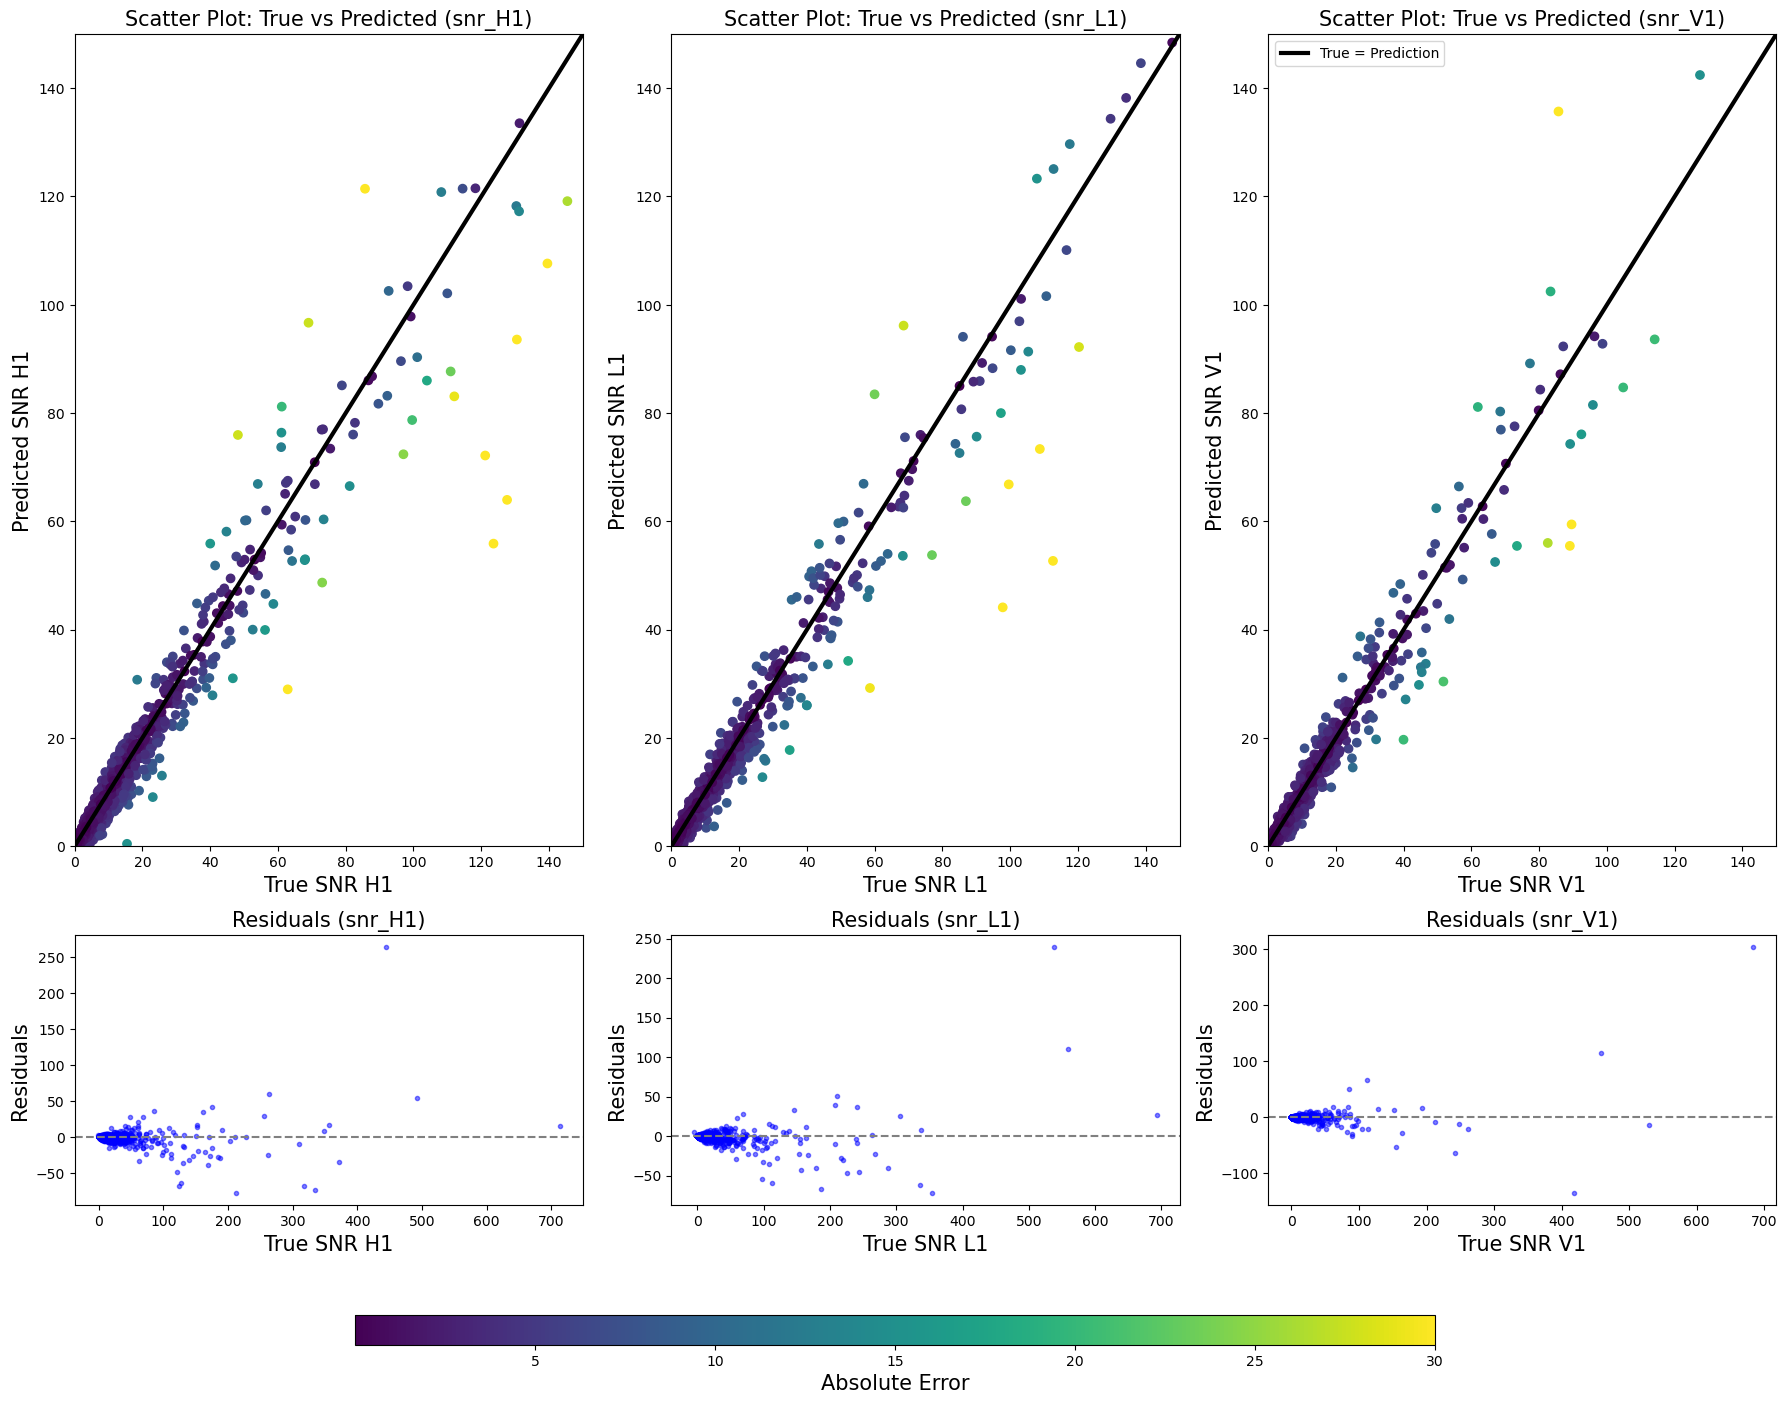

In [3]:
true_H1 = (GWdata_testing[['snr_H1']].values)[:,0]
true_L1 = (GWdata_testing[['snr_L1']].values)[:,0]
true_V1 = (GWdata_testing[['snr_V1']].values)[:,0]
# Create horizontal subplots for scatter plots of predicted vs true SNR values with residuals below
fig, axes = plt.subplots(2, 3, figsize=(18, 15), gridspec_kw={'height_ratios': [3, 1]})

# True vs Predicted SNR H1
sc1 = axes[0, 0].scatter(x=snr_H1, y=true_H1, c=np.abs(snr_H1 - true_H1), cmap='viridis', vmax=30)
axes[0, 0].set_title('Scatter Plot: True vs Predicted (snr_H1)', fontsize=15)
axes[0, 0].set_xlabel('True SNR H1', fontsize=15)
axes[0, 0].set_ylabel('Predicted SNR H1', fontsize=15)
axes[0, 0].set_ylim([0, 150])
axes[0, 0].set_xlim([0, 150])
axes[0, 0].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR H1
residuals_H1 = true_H1 - snr_H1
axes[1, 0].plot(snr_H1, residuals_H1, 'b.', alpha=0.5)
axes[1, 0].axhline(0, color='gray', linestyle='--')
axes[1, 0].set_xlabel('True SNR H1', fontsize=15)
axes[1, 0].set_ylabel('Residuals', fontsize=15)
axes[1, 0].set_title('Residuals (snr_H1)', fontsize=15)

# True vs Predicted SNR L1
sc2 = axes[0, 1].scatter(x=snr_L1, y=true_L1, c=np.abs(snr_L1 - true_L1), cmap='viridis', vmax=30)
axes[0, 1].set_title('Scatter Plot: True vs Predicted (snr_L1)', fontsize=15)
axes[0, 1].set_xlabel('True SNR L1', fontsize=15)
axes[0, 1].set_ylabel('Predicted SNR L1', fontsize=15)
axes[0, 1].set_ylim([0, 150])
axes[0, 1].set_xlim([0, 150])
axes[0, 1].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR L1
residuals_L1 = true_L1 - snr_L1
axes[1, 1].plot(snr_L1, residuals_L1, 'b.', alpha=0.5)
axes[1, 1].axhline(0, color='gray', linestyle='--')
axes[1, 1].set_xlabel('True SNR L1', fontsize=15)
axes[1, 1].set_ylabel('Residuals', fontsize=15)
axes[1, 1].set_title('Residuals (snr_L1)', fontsize=15)

# True vs Predicted SNR V1
sc3 = axes[0, 2].scatter(x=snr_V1, y=true_V1, c=np.abs(snr_V1 - true_V1), cmap='viridis', vmax=30)
axes[0, 2].set_title('Scatter Plot: True vs Predicted (snr_V1)', fontsize=15)
axes[0, 2].set_xlabel('True SNR V1', fontsize=15)
axes[0, 2].set_ylabel('Predicted SNR V1', fontsize=15)
axes[0, 2].set_ylim([0, 150])
axes[0, 2].set_xlim([0, 150])
axes[0, 2].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3, label='True = Prediction')
axes[0, 2].legend()

# Residuals for SNR V1
residuals_V1 = true_V1 - snr_V1
axes[1, 2].plot(snr_V1, residuals_V1, 'b.', alpha=0.5)
axes[1, 2].axhline(0, color='gray', linestyle='--')
axes[1, 2].set_xlabel('True SNR V1', fontsize=15)
axes[1, 2].set_ylabel('Residuals', fontsize=15)
axes[1, 2].set_title('Residuals (snr_V1)', fontsize=15)

# Add a separate axis for the colorbar below the residuals
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sc3, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Absolute Error', fontsize=15)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('models/MLP_models/O4_SNR_approx_HLV/true_vs_pred.png', dpi = 300)
plt.show()


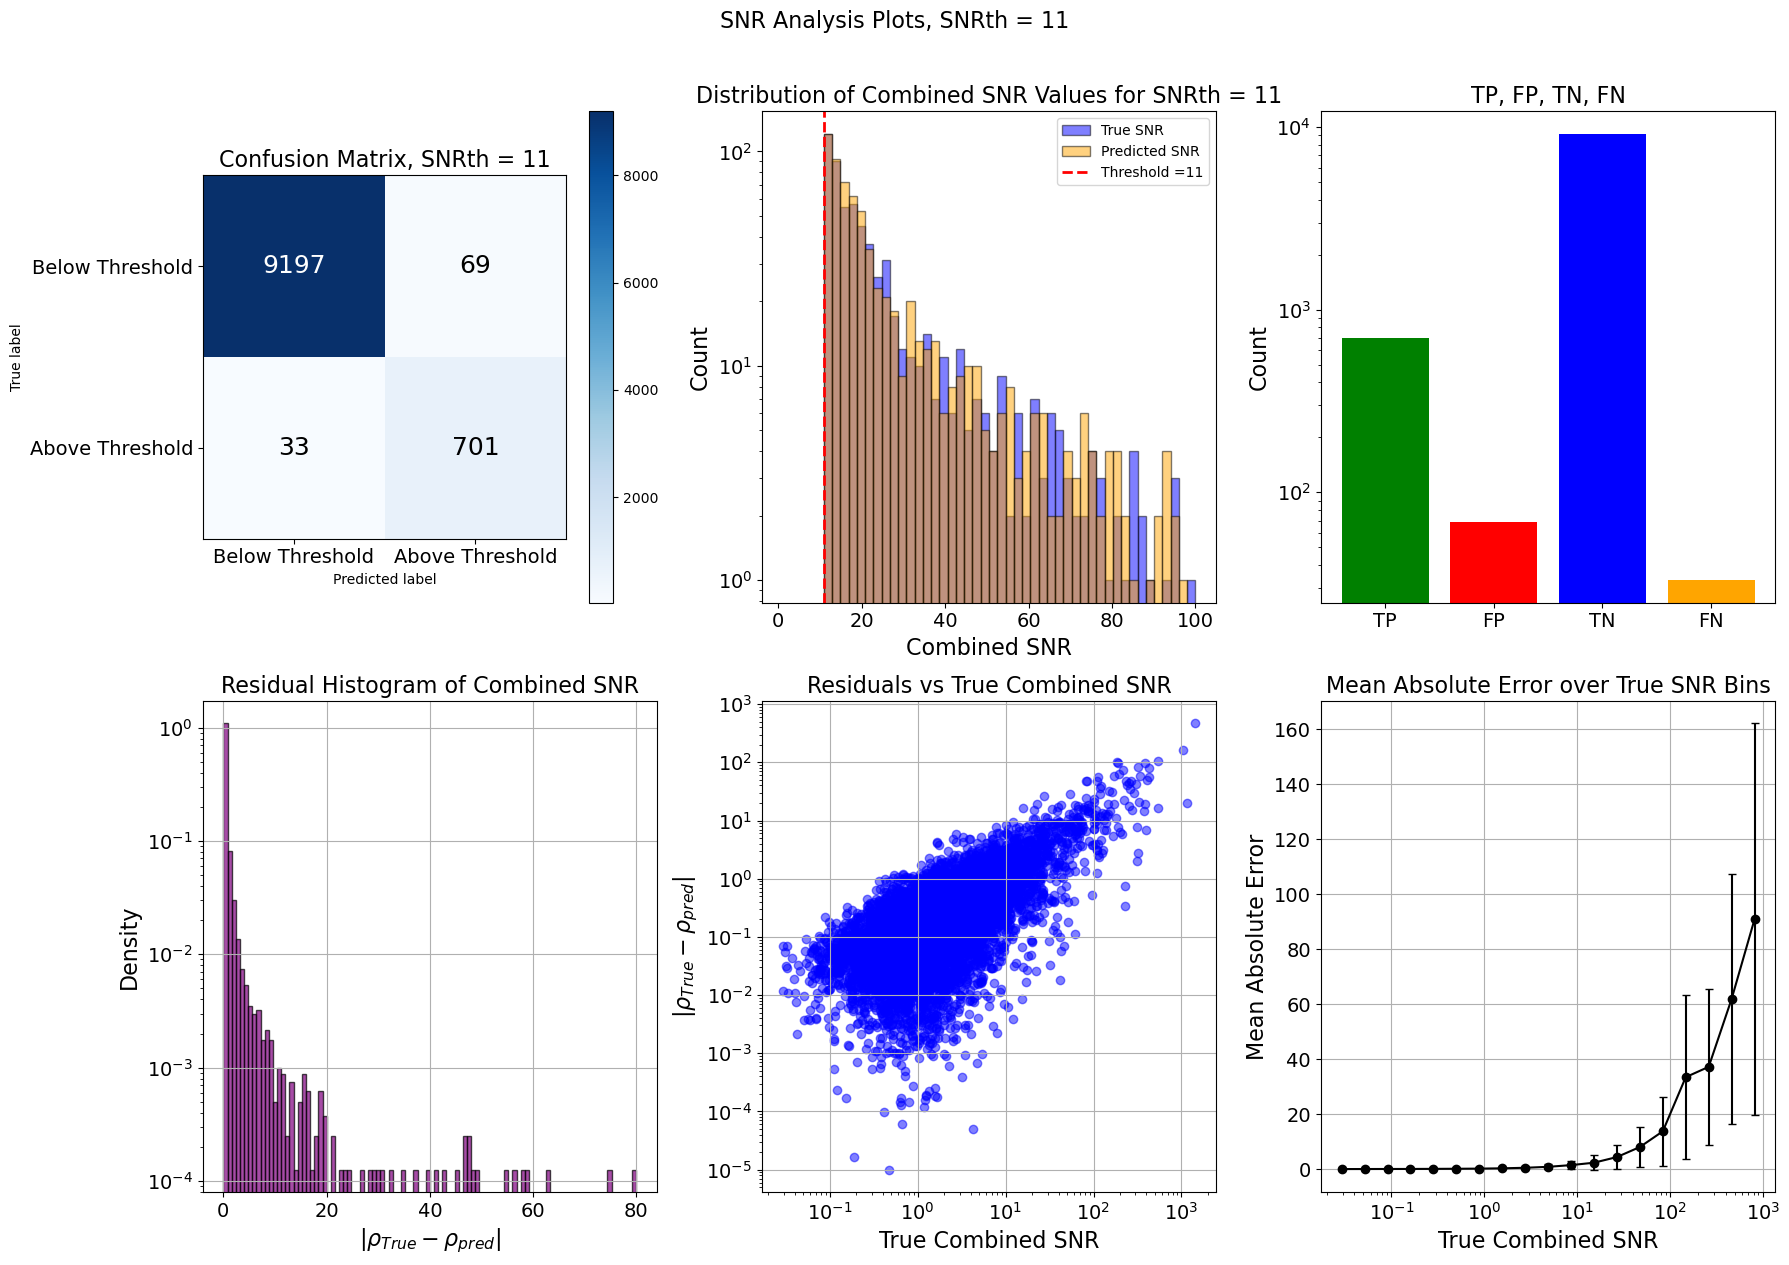

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assume snr_combined_pred, snr_combined_true, and threshold are already defined
# Calculate residuals
residuals = snr_combined_true - snr_combined_pred

# Create a figure with five subplots: three in the first row, and two in the second row
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the ax array for easier indexing
ax = ax.flatten()

# Confusion Matrix Heatmap
cm = confusion_matrix(true_labels_combined, pred_labels_combined)
im = ax[0].imshow(cm, cmap='Blues', interpolation='nearest')
ax[0].figure.colorbar(im, ax=ax[0])
ax[0].set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=['Below Threshold', 'Above Threshold'],
          yticklabels=['Below Threshold', 'Above Threshold'],
          ylabel='True label',
          xlabel='Predicted label')
ax[0].set_title('Confusion Matrix, SNRth = {}'.format(threshold), fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax[0].text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                   color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=18)

# Histogram Plot for True and Predicted SNR Distributions
ax[1].hist(snr_combined_true[snr_combined_true > threshold], bins=50, alpha=0.5, label='True SNR', color='blue', edgecolor='black', range=(1, 100))
ax[1].hist(snr_combined_pred[snr_combined_pred > threshold], bins=50, alpha=0.5, label='Predicted SNR', color='orange', edgecolor='black', range=(1, 100))
ax[1].set_yscale('log')
ax[1].axvline(threshold, color='red', linestyle='--', linewidth=2, label='Threshold ={}'.format(threshold))
ax[1].set_title('Distribution of Combined SNR Values for SNRth = {}'.format(threshold), fontsize=16)
ax[1].set_xlabel('Combined SNR', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].legend()

# True Positives, False Positives, True Negatives, and False Negatives Plot
true_positives = cm[1, 1]
false_positives = cm[0, 1]
true_negatives = cm[0, 0]
false_negatives = cm[1, 0]
ax[2].bar(['TP', 'FP', 'TN', 'FN'],
          [true_positives, false_positives, true_negatives, false_negatives],
          color=['green', 'red', 'blue', 'orange'])
ax[2].set_title('TP, FP, TN, FN', fontsize=16)
ax[2].set_ylabel('Count', fontsize=16)
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='major', labelsize=14)

# Residual Histogram (below)
ax[3].hist(abs(residuals), bins=100, color='purple', edgecolor='black', alpha=0.7, range=(0, 80), density=1)
ax[3].set_title('Residual Histogram of Combined SNR', fontsize=16)
ax[3].set_xlabel(r'$|\rho_{True} - \rho_{pred}|$', fontsize=16)
ax[3].set_ylabel('Density', fontsize=16)
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='major', labelsize=14)
ax[3].grid(True)

# Scatter Plot of Residuals Against True SNR (below)
ax[4].scatter(snr_combined_true, abs(residuals), color='blue', alpha=0.5)
ax[4].set_title('Residuals vs True Combined SNR', fontsize=16)
ax[4].set_xlabel('True Combined SNR', fontsize=16)
ax[4].set_ylabel(r'$|\rho_{True} - \rho_{pred}|$', fontsize=16)
ax[4].set_xscale('log')
ax[4].set_yscale('log')
ax[4].tick_params(axis='both', which='major', labelsize=14)
ax[4].grid(True)

# Sixth Plot: Mean Absolute Error (MAE) over Bins of True SNR with Error Bars
bin_edges = np.logspace(np.log10(min(snr_combined_true)), np.log10(max(snr_combined_true)), 20)  # Logarithmically spaced bins
bin_indices = np.digitize(snr_combined_true, bins=bin_edges)
mae_per_bin = []
std_per_bin = []

for i in range(1, len(bin_edges)):
    bin_mask = (bin_indices == i)
    if np.sum(bin_mask) > 0:
        mae = np.mean(abs(residuals[bin_mask]))
        std = np.std(abs(residuals[bin_mask]))
        mae_per_bin.append(mae)
        std_per_bin.append(std)
    else:
        mae_per_bin.append(np.nan)
        std_per_bin.append(np.nan)

# Plotting MAE over Bins with Error Bars
ax[5].errorbar(bin_edges[:-1], mae_per_bin, yerr=std_per_bin, fmt='o-', color='black', ecolor='black', capsize=3)
ax[5].set_xscale('log')
ax[5].set_title('Mean Absolute Error over True SNR Bins', fontsize=16)
ax[5].set_xlabel('True Combined SNR', fontsize=16)
ax[5].set_ylabel('Mean Absolute Error', fontsize=16)
ax[5].tick_params(axis='both', which='major', labelsize=14)
ax[5].grid(True)



# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.tight_layout()
plt.suptitle('SNR Analysis Plots, SNRth = {}'.format(threshold), fontsize=16, y=1.05)
plt.savefig('models/MLP_models/O4_SNR_approx_HLV/confusion_and_statistics.png', dpi = 300)
# Display the figure
plt.show()


In [100]:
# Generate simple linear data for testing
def y_funct(x, a, b, c):
    return x**(2) * a + b*x + c

N = 10000
x_vals = np.linspace(-100, 100, N)
a, b, c = np.random.uniform(-10, 10, size=N), np.random.uniform(-10, 10, size=N), np.random.uniform(-10, 10, size=N)
y_vals = y_funct(x_vals, a, b, c) + np.random.normal(0, 1, size=len(x_vals))

# Stack x_vals to create the input feature matrix with a single feature (x)
X = np.vstack([x_vals, y_vals]).T
# Stack a and b to create the target matrix (predicting 'a' and 'b')
y = np.vstack([a, b, c]).T

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and set device for the model
# Since we are predicting two values (a and b), output_size is set to 2
model = mlp.MLP(input_size=2, hidden_layers=[64, 32, 16, 32, 64], output_size=3)
model.set_device(device = 'cuda:0')

# Train the model with training and validation data
model.train_model(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, epochs=100, batch_size = 10000, learning_rate = 0.001, save_dir="models/MLP_models/predict_a_b")

# Save the model and scalers to the specified folder
model.save_model(save_dir="models/MLP_models/predict_a_b")


Epoch [100/100], Training Loss: 0.7453, Validation Loss: 0.7436
Model and scalers saved in folder: models/MLP_models/predict_a_b


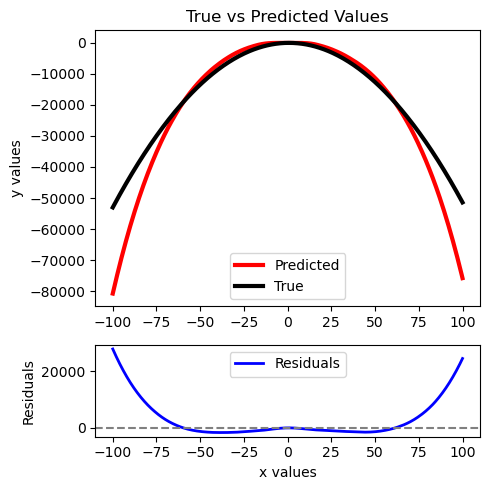

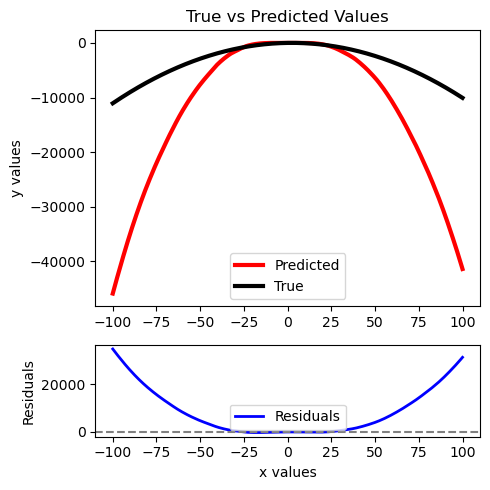

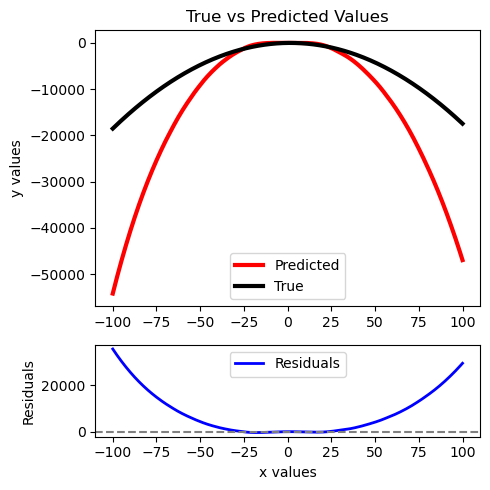

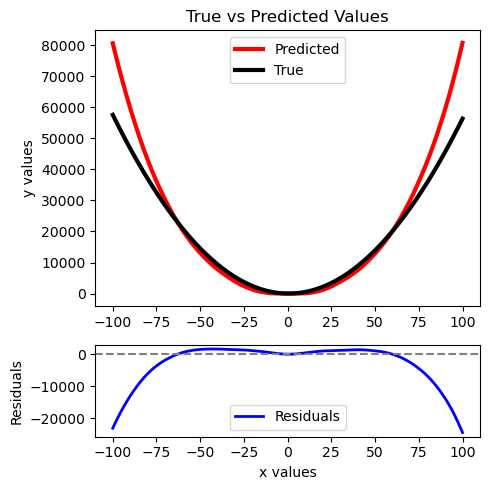

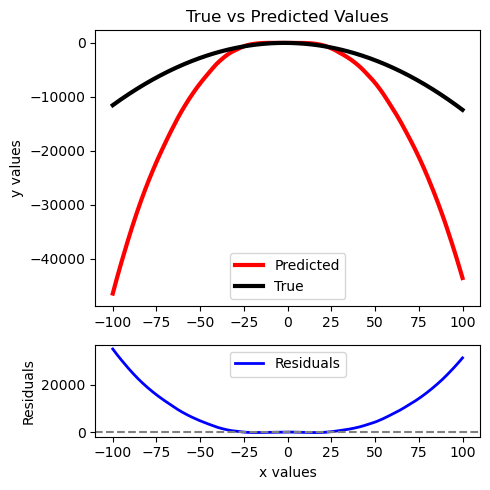

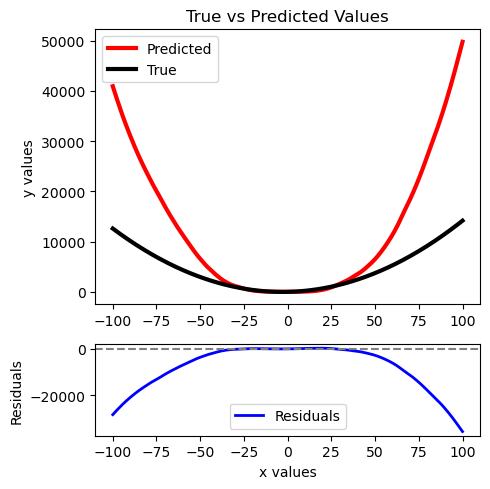

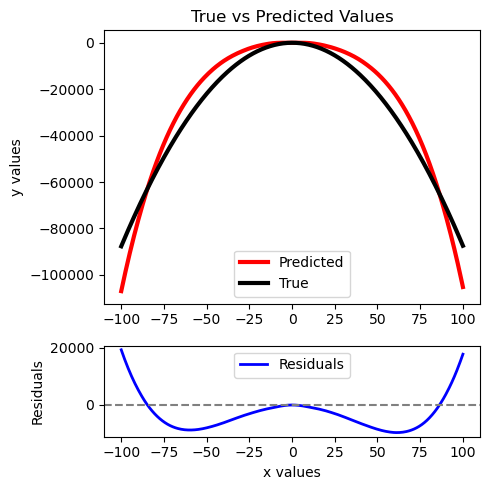

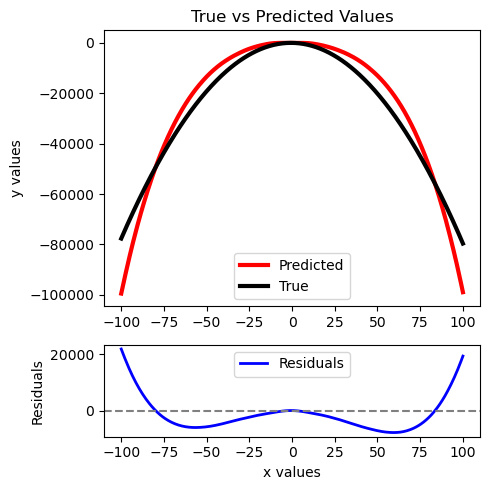

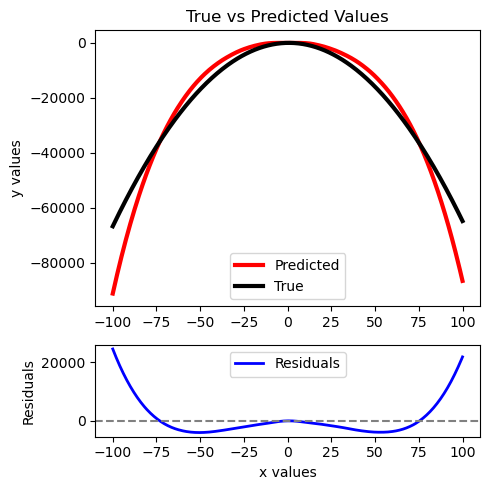

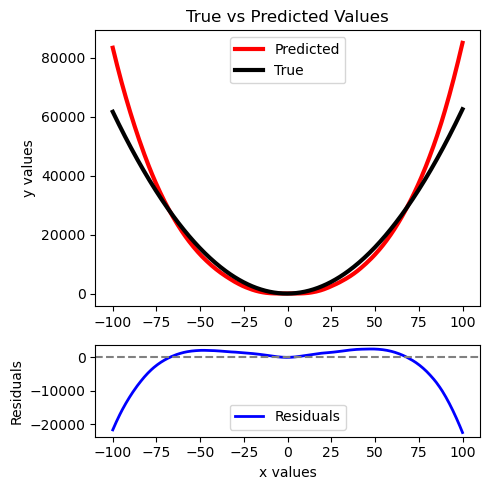

In [101]:
for i in range(10):
    # Generate new data for testing (extrapolation and interpolation)
    x_test_vals = np.linspace(-100, 100, 400)  # Generate 400 values from 0 to 120
    a,b,c = np.random.uniform(-10, 10, size=1), np.random.uniform(-10, 10, size=1), np.random.uniform(-10, 10, size=1)
    a_test, b_test, c_test = a*np.ones(400), b*np.ones(400), c*np.ones(400)
    y_test_vals = y_funct(x_test_vals, a_test, b_test, c_test) #+ np.random.normal(0, 1, size=len(x_test_vals))
    
    # Prepare test input features and target values
    X_test =np.vstack([x_test_vals, y_test_vals]).T

    ab_pred = mlp.load_and_predict(X_test, model_dir='models/MLP_models/predict_a_b', device='cpu')
    
    a_pred, b_pred, c_pred= ab_pred[:,0], ab_pred[:,1], ab_pred[:,2]
    
    # Plot predicted vs true values along with residuals
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(5, 5))
    
    # Plot true vs predicted y values
    ax1.plot(x_test_vals, y_funct(x_test_vals, a_pred, b_pred, c_pred), '-r', linewidth=3, label='Predicted')
    ax1.plot(x_test_vals, y_test_vals, '-k', linewidth=3, label='True')
    ax1.set_ylabel('y values')
    ax1.legend()
    ax1.set_title('True vs Predicted Values')
    
    # Calculate and plot residuals
    residuals = y_test_vals - y_funct(x_test_vals, a_pred, b_pred, c_pred)
    ax2.plot(x_test_vals, residuals, '-b', linewidth=2, label='Residuals')
    ax2.set_xlabel('x values')
    ax2.set_ylabel('Residuals')
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
